In [1]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (60.0, 60.0)
import matplotlib.pyplot as plt
import sem
import scipy.linalg as la
from math import *

In [2]:
def mesh(alpha, N):
    return .5*np.sin(np.linspace(-pi/2+alpha,pi/2-alpha,N))/abs(sin((pi/2-alpha)))

In [3]:
def wall_units(yl, Nz, p, Re, plot=False):
    lstar=.5/Re;
    As, Bs, Cs, Ds, z, w = sem.semhat(p)
    y_gll = np.zeros(0)
    for i in range(len(yl)-1):
        y_gll = np.append(y_gll, yl[i]+ (z+1.)/2. * (yl[i+1]-yl[i]))
    ym_vec = (y_gll[1:] - y_gll[:-1]) / lstar
    y_p = (y_gll-y_gll[0])/lstar
    ym = np.max(ym_vec)
    cm = np.min(ym_vec[ym_vec > 0])
    y1 = y_p[3]
    y10=np.max(ym_vec[1:2*p+3])
    y10=np.max(ym_vec[1:11])
    y10 = y_p[9]
    if plot:
        plt.plot(yl,np.ones(yl.size))
        plt.plot(y_gll,np.ones(y_gll.size))
    
    z_gll = np.zeros(0)
    zg = np.linspace(0,24,Nz)
    for i in range(len(zg)-1):
        z_gll = np.append(z_gll, zg[i]+ (z+1.)/2. * (zg[i+1]-zg[i]))
    zn = np.max(z_gll[1:]-z_gll[:-1])/lstar
    return ym, y1, y10, zn, cm

def plot_units(yms, y1s, y10s, zms, line=None):
    plt.plot(alphs,yms, label='max[Delta y]')
    plt.plot(alphs,y1s, label='y(4)')
    plt.plot(alphs,y10s, label='y(10)')
    plt.plot(alphs,zms, label = 'max[Delta z]')
    plt.axhline(1.0, color='green')
    plt.axhline(6.0, color='red')
    plt.axhline(5.0, color='blue')
    if line is not None:
        plt.axvline(line, color='black')
    plt.grid()
    plt.legend()
    plt.xlabel('alpha')
    plt.ylabel('Wall units')

In [4]:
def plot_mesh(yl):
    plt.plot(yl,np.ones(yl.size), 'o')

Final values: 2.70566604221 0.617929629715 3.86171048611 4.63205821815 0.090411324894


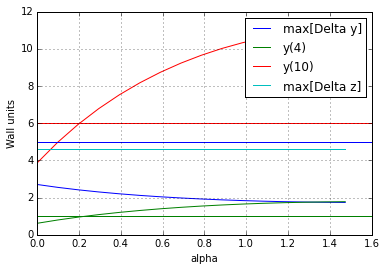

In [24]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=60;
N = 15
Nl = 8
Nz = 64
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

alpha = 0.0
plot_units(yms, y1s, y10s, zms, alpha)
yl=mesh(alpha, Nl)
ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
print("Final values:", ym, y1, y10, zm, cm)

Find the best $\alpha$ for $p = 7, N_y = 256, N_z = 2048$

Final values: 4.83398960686 0.963782034116 2.61104126496 9.81090083918 0.156335422152


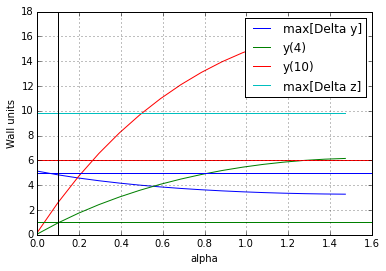

In [5]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=2000;
N = 7
Nl = 257
Nz = 2049
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

alpha = 0.1
plot_units(yms, y1s, y10s, zms, alpha)
yl=mesh(alpha, Nl)
ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
print("Final values:", ym, y1, y10, zm, cm)

[-0.5        -0.49939055 -0.49871517 -0.49797394 -0.49716696 -0.49629434
 -0.49535619 -0.49435264 -0.49328382 -0.49214987 -0.49095094 -0.48968718
 -0.48835878 -0.48696589 -0.48550871 -0.48398743 -0.48240224 -0.48075336
 -0.47904101 -0.47726541 -0.47542679 -0.4735254  -0.47156149 -0.46953532
 -0.46744716 -0.46529727 -0.46308596 -0.4608135  -0.4584802  -0.45608636
 -0.45363231 -0.45111836 -0.44854485 -0.44591211 -0.44322051 -0.44047038
 -0.4376621  -0.43479603 -0.43187255 -0.42889205 -0.42585493 -0.42276158
 -0.41961241 -0.41640784 -0.41314828 -0.40983418 -0.40646597 -0.40304409
 -0.399569   -0.39604115 -0.39246101 -0.38882905 -0.38514576 -0.38141161
 -0.37762711 -0.37379274 -0.36990903 -0.36597647 -0.36199559 -0.35796692
 -0.35389098 -0.34976832 -0.34559948 -0.34138501 -0.33712546 -0.3328214
 -0.3284734  -0.32408203 -0.31964787 -0.31517151 -0.31065353 -0.30609454
 -0.30149513 -0.29685592 -0.29217751 -0.28746053 -0.28270559 -0.27791332
 -0.27308436 -0.26821935 -0.26331892 -0.25838372 -0.

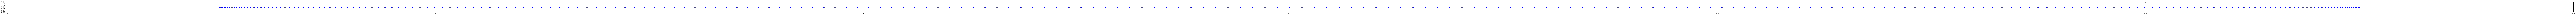

In [6]:
yl=mesh(.1, 257)
plt.figure(figsize=(256,1))
plot_mesh(yl)
plt.savefig('mesh_8.png')
print(yl)

Find the best $\alpha$ for $p = 15, N_y = 128, N_z = 1024$

Final values: 4.09836018312 0.910853377953 5.8787246943 8.88337375868 0.132784318473


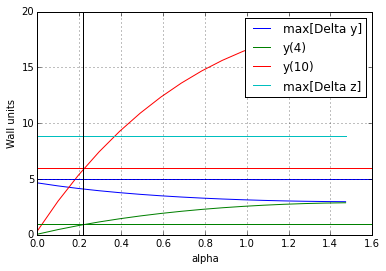

In [7]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=2000;
N = 16
Nl = 129
Nz = 1025
yms = []; y1s = []; y10s = []; zms = []; cms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)
    cms.append(cm)

alpha = 0.22
plot_units(yms, y1s, y10s, zms, alpha)
yl=mesh(alpha, Nl)
ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
print("Final values:", ym, y1, y10, zm, cm)

[-0.5        -0.49752893 -0.49483624 -0.49192312 -0.48879087 -0.48544089
 -0.48187466 -0.47809379 -0.47409994 -0.4698949  -0.46548054 -0.46085884
 -0.45603184 -0.4510017  -0.44577066 -0.44034105 -0.43471529 -0.42889588
 -0.42288542 -0.41668658 -0.41030213 -0.4037349  -0.39698783 -0.39006392
 -0.38296625 -0.37569799 -0.36826237 -0.36066271 -0.35290239 -0.34498487
 -0.33691367 -0.3286924  -0.3203247  -0.31181432 -0.30316503 -0.2943807
 -0.28546524 -0.27642261 -0.26725685 -0.25797204 -0.24857231 -0.23906186
 -0.22944492 -0.21972576 -0.20990873 -0.1999982  -0.18999858 -0.17991431
 -0.16974991 -0.15950989 -0.14919882 -0.13882128 -0.12838191 -0.11788534
 -0.10733627 -0.09673938 -0.0860994  -0.07542106 -0.06470913 -0.05396837
 -0.04320357 -0.03241953 -0.02162105 -0.01081293  0.          0.01081293
  0.02162105  0.03241953  0.04320357  0.05396837  0.06470913  0.07542106
  0.0860994   0.09673938  0.10733627  0.11788534  0.12838191  0.13882128
  0.14919882  0.15950989  0.16974991  0.17991431  0.

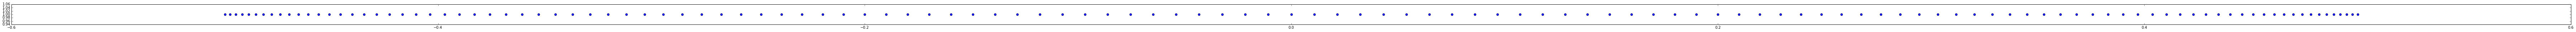

In [8]:
yl=mesh(0.22, 129)
plt.figure(figsize=(128,1))
plot_mesh(yl)
plt.savefig('mesh_16.png')
print(yl)

Find the best $\alpha$ for $p = 31, N_y = 64, N_z = 512$

Final values: 4.03100126971 0.773371801805 5.92147490525 9.34963594624 0.110529327876


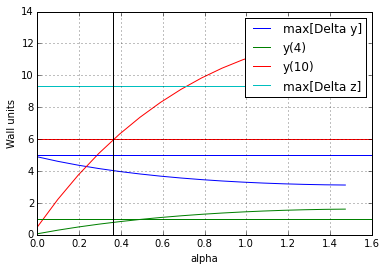

In [9]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=2000;
N = 31
Nl = 65
Nz = 513
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

alpha = 0.36
plot_units(yms, y1s, y10s, zms, alpha)
yl=mesh(alpha, Nl)
ym, y1, y10, zm, cm = wall_units(yl,Nz, N,Re)
print("Final values:", ym, y1, y10, zm, cm)

[-0.5        -0.49252277 -0.48434051 -0.4754649  -0.46590867 -0.4556855
 -0.44481001 -0.43329778 -0.42116528 -0.40842989 -0.39510983 -0.38122417
 -0.3667928  -0.35183635 -0.33637626 -0.32043464 -0.30403433 -0.28719879
 -0.26995212 -0.25231902 -0.23432472 -0.21599499 -0.19735607 -0.17843463
 -0.15925776 -0.13985291 -0.12024787 -0.10047069 -0.08054968 -0.06051337
 -0.04039044 -0.02020968  0.          0.02020968  0.04039044  0.06051337
  0.08054968  0.10047069  0.12024787  0.13985291  0.15925776  0.17843463
  0.19735607  0.21599499  0.23432472  0.25231902  0.26995212  0.28719879
  0.30403433  0.32043464  0.33637626  0.35183635  0.3667928   0.38122417
  0.39510983  0.40842989  0.42116528  0.43329778  0.44481001  0.4556855
  0.46590867  0.4754649   0.48434051  0.49252277  0.5       ]


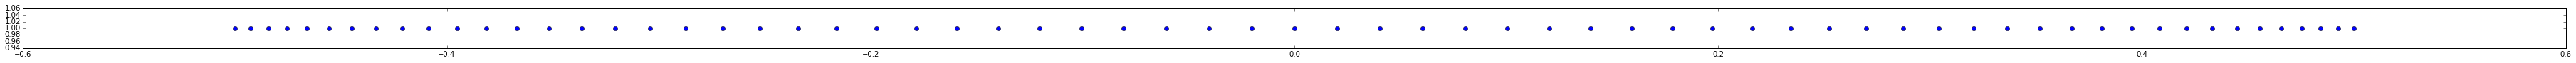

In [10]:
yl=mesh(.36, 65)
plt.figure(figsize=(64,1))
plot_mesh(yl)
plt.savefig('mesh_32.png')
print(yl)